In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [3]:
client=pd.read_csv("segmentation data.csv",index_col=0)
df_purchase=pd.read_csv("purchase data.csv",index_col=0)

In [12]:
df_purchase.tail()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000500,703,0,0,0,2,1,1.41,1.85,2.01,2.24,...,1,0,0,0,0,42,1,120946,1,0
200000500,710,0,0,0,0,0,1.36,1.84,2.09,2.24,...,0,0,0,0,0,42,1,120946,1,0
200000500,717,0,0,0,0,0,1.50,1.80,2.14,2.24,...,0,0,0,0,0,42,1,120946,1,0
200000500,722,1,2,3,0,0,1.51,1.82,2.09,2.24,...,0,0,0,0,0,42,1,120946,1,0
200000500,726,0,0,0,2,1,1.51,1.82,2.09,2.24,...,0,0,0,0,0,42,1,120946,1,0


In [4]:
c=client.corr()

Text(0.5, 1, 'Correlation Heatmap')

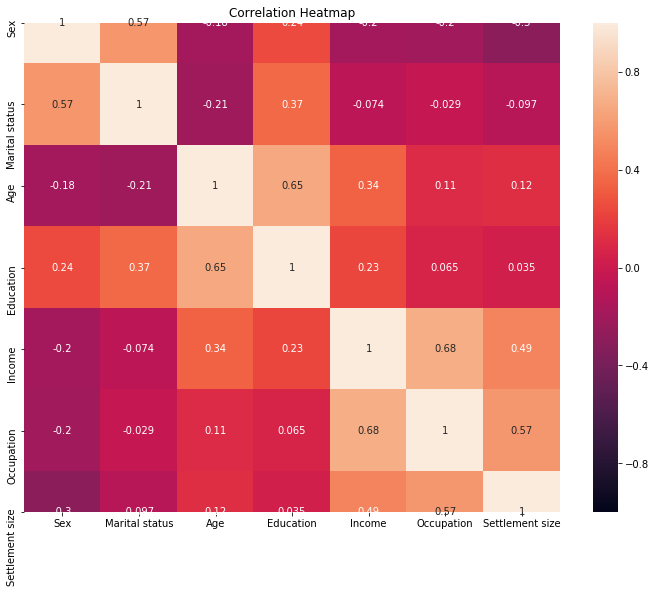

In [14]:
plt.figure(figsize=(12,9))
s=sns.heatmap(c,annot=True,vmax=1, vmin=-1)
plt.title('Correlation Heatmap')

In [5]:
client.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


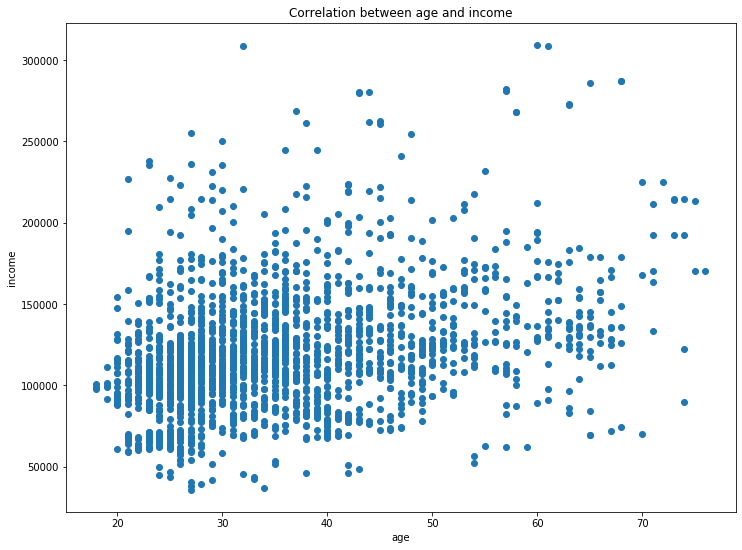

In [15]:
plt.figure(figsize=(12,9))
plt.scatter(client.iloc[:,2],client.iloc[:,4])
plt.xlabel('age')
plt.ylabel('income')
plt.title('Correlation between age and income')
plt.show()

In [16]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(client)
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [17]:
hier_clust = linkage(segmentation_std, method = 'ward')
hier_clust

array([[4.78000000e+02, 1.95700000e+03, 3.41213651e-04, 2.00000000e+00],
       [6.73000000e+02, 8.21000000e+02, 3.93708059e-04, 2.00000000e+00],
       [8.67000000e+02, 9.33000000e+02, 8.92404934e-04, 2.00000000e+00],
       ...,
       [3.99200000e+03, 3.99500000e+03, 5.67337517e+01, 1.18000000e+03],
       [3.99000000e+03, 3.99400000e+03, 6.30691755e+01, 8.20000000e+02],
       [3.99600000e+03, 3.99700000e+03, 7.73495855e+01, 2.00000000e+03]])

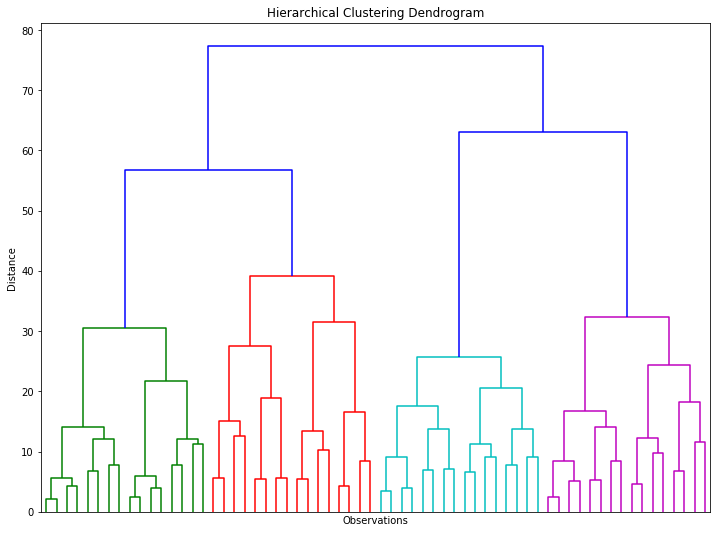

In [18]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

In [19]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

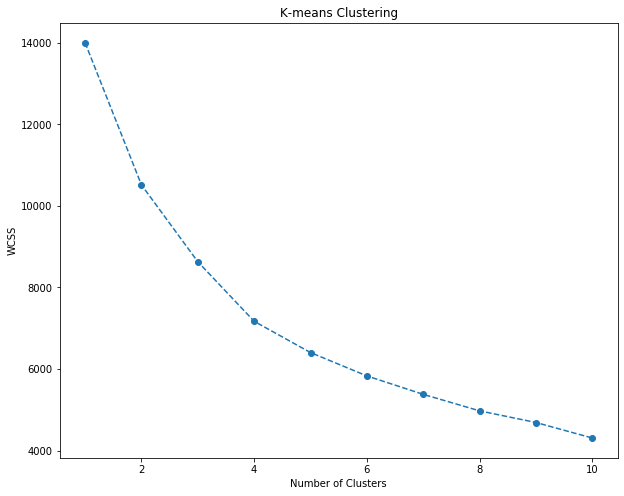

In [20]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
df_segm_kmeans=client.copy()
df_segm_kmeans['Segment K-means']=kmeans.labels_
df_segm_analysis=df_segm_kmeans.groupby('Segment K-means').mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [23]:
df_segm_analysis['Nomber of observations']=df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Nomber of observations']

Segment K-means
0    263
1    462
2    570
3    705
Name: Nomber of observations, dtype: int64

In [24]:
df_segm_analysis['proportion']=df_segm_analysis['Nomber of observations']/client.shape[0]

In [25]:
df_segm_analysis.rename({0:'well_off', 1:'fewer_opportunities', 2:'career_focused', 3:'Standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Nomber of observations,proportion
Segment K-means,,,,,,,,,
well_off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer_opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career_focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [26]:
df_segm_kmeans['labels']=df_segm_kmeans['Segment K-means'].map({0:'well_off', 1:'fewer_opportunities', 2:'career_focused', 3:'Standard'})
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well_off
100000002,1,1,22,1,150773,1,2,3,Standard
100000003,0,0,49,1,89210,0,0,1,fewer_opportunities
100000004,0,0,45,1,171565,1,1,2,career_focused
100000005,0,0,53,1,149031,1,1,2,career_focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer_opportunities
100001997,1,1,27,1,117744,1,0,3,Standard
100001998,0,0,31,0,86400,0,0,1,fewer_opportunities


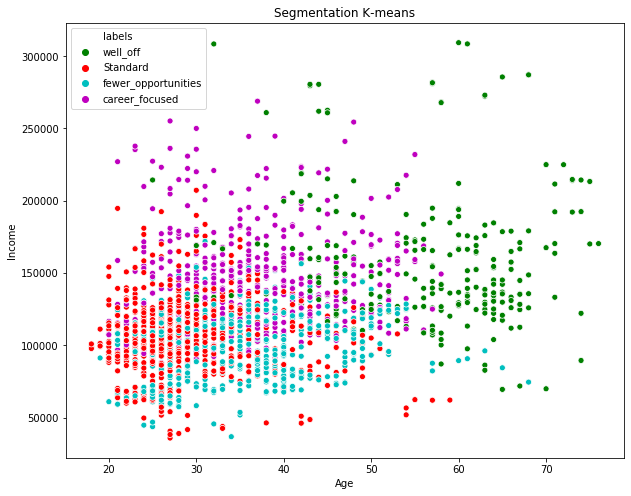

In [27]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [28]:
pca=PCA()
pca.fit(segmentation_std)
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

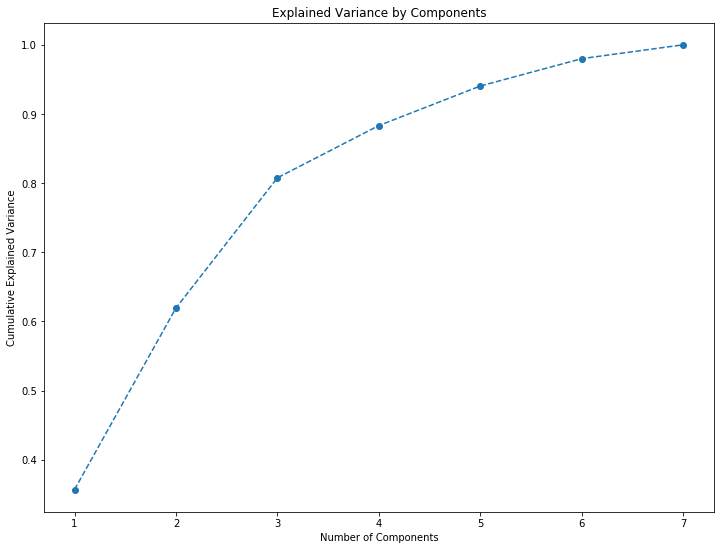

In [29]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [30]:
pca=PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = client.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x1a21b3c110>,
 <a list of 3 Text yticklabel objects>)

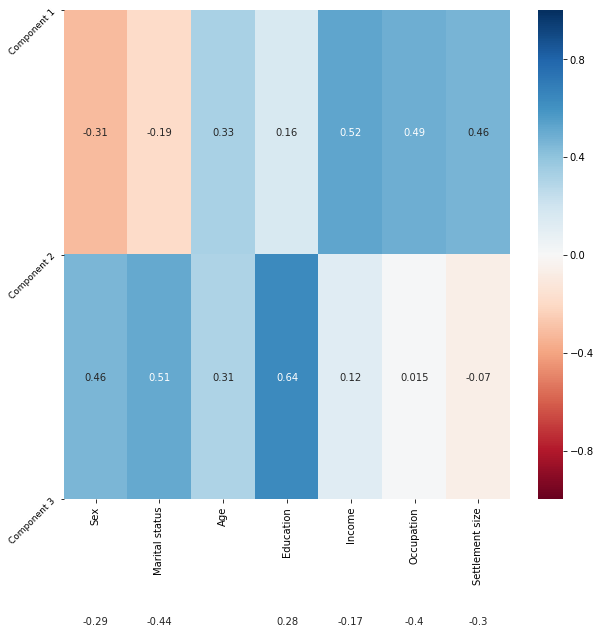

In [32]:
# Based on the heatmap, we could determine the cluster of each component 

plt.figure(figsize=(10,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [33]:
scores_pca = pca.transform(segmentation_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [28]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

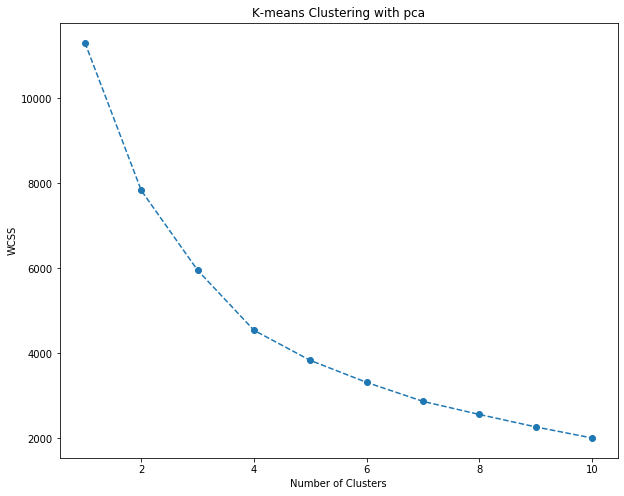

In [29]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with pca')
plt.show()

In [44]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
kmeans_pca

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [31]:
df_segm_pca_kmeans = pd.concat([client.reset_index(drop=True), pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby('Segment K-means PCA').mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [33]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [32]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
career focused,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
fewer opportunities,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
well-off,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [34]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0,standard
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,fewer opportunities
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,career focused
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3,well-off
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3,well-off
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1,career focused
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,fewer opportunities
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1,career focused
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,fewer opportunities


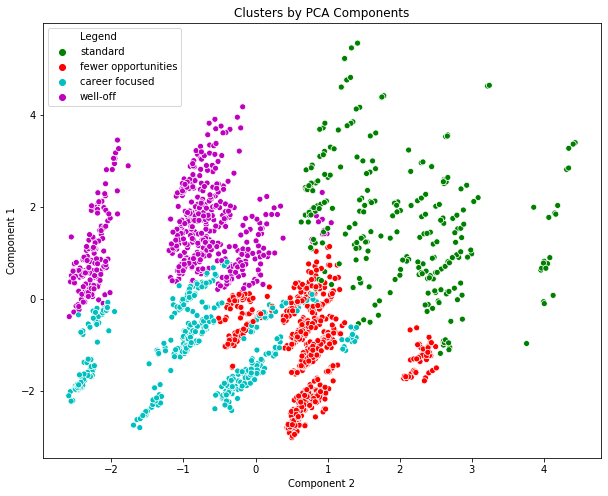

In [35]:
x_axis = df_segm_pca_kmeans['Component 2']#lifestyle
y_axis = df_segm_pca_kmeans['Component 1']#career focused
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [41]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [42]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [43]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))